### <span style = 'color:green'>problem statement : detect credit card fraud transactions using Logistic Regression</span>

.


- Logistic Regression is a Machine Learning algorithm used to make predictions to find the value of a dependent variable such as the condition of a tumor (malignant or benign), classification of email (spam or not spam), or admission into a university (admitted or not admitted) by learning from independent variables (various features relevant to the problem).

**Difference between Logistic and Linear Regression**
The major difference between Logistic and Linear Regression is that Linear Regression is used to solve regression problems whereas Logistic Regression is used for classification problems.

**About the dataset**
- The dataset contains transactions made by credit cards in September 2013 by European cardholders.This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions



**Expected output**
- **Use histogram to represent to all the data**
- **Use Classification Report for scores**
- **Plot confusion matrix**


In [2]:
import pandas as pd
import numpy as np
import matplotlib. pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings (action="ignore", module="scipy", message="^internal gelsd")

In [3]:
df = pd.read_csv(r"D:\Desktop\creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


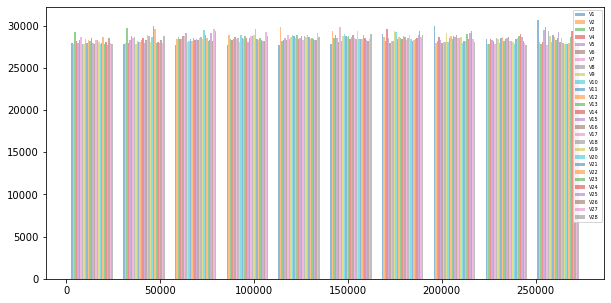

In [50]:
x1=df[ 'V1' ]
x2=df[ 'V2' ]
x3=df[ 'V3' ]
x4=df[ 'V4' ]
x5=df[ 'V5' ]
x6=df[ 'V6' ]
x7=df[ 'V7' ]
x8=df[ 'V8' ]
x9=df[ 'V9' ]
x10=df[ 'V10' ]
x11=df[ 'V11' ]
x12=df[ 'V12' ]
x13=df[ 'V13' ]
x14=df[ 'V14' ]
x15=df[ 'V15' ]
x16=df[ 'V16' ]
x17=df[ 'V17' ]
x18=df[ 'V18' ]
x19=df[ 'V19' ]
x20=df[ 'V20' ]
x21=df[ 'V21' ]
x22=df[ 'V22' ]
x23=df[ 'V23' ]
x24=df[ 'V24' ]
x25=df[ 'V25' ]
x26=df[ 'V26' ]
x27=df[ 'V27' ]
x28=df[ 'V28' ]


plt. figure(figsize=(10, 5))
plt. hist( [x1, x2,x3, x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28], label=[ 'V1' ,'V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28'], bins = 10, alpha = 0.5)
plt . legend(borderpad=0.5, fontsize=5)
plt. show( )

In [4]:
df.isnull().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [18]:
from sklearn . preprocessing import LabelEncoder
le=LabelEncoder( )
for col in df . columns:
    df [col] = le. fit_transform (df [col] )
df . head ()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,44928,120599,270851,243083,105668,211710,167150,159663,185803,...,140442,174834,90634,147486,160454,105171,218749,102230,13502,0
1,0,190308,160391,134835,182525,151841,161430,120001,155852,112665,...,68639,54299,190891,72302,168529,179871,126158,142841,268,0
2,1,44982,28959,251918,175559,87589,253515,227985,194133,20473,...,223177,233865,269516,36866,68122,117706,81907,61165,23493,0
3,1,67135,107605,252751,68890,143700,244170,166825,214475,24537,...,108399,136591,60398,13166,253297,96705,191339,195684,11549,0
4,2,55018,212082,240745,177861,97922,181139,207795,54735,222386,...,143568,236625,79502,163439,94807,232984,235552,255032,6905,0


<AxesSubplot:>

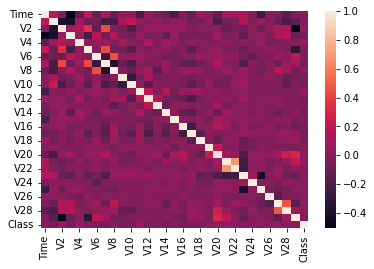

In [19]:
sns.heatmap(df.corr())

In [9]:
X = df.iloc[:, :-1] . values
y = df.iloc[:, -1]. values

In [10]:
#split the data
from sklearn. model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =0)

In [13]:
#Fitting logistic regression to training set
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression ( random_state =0)
clf .fit(X_train, y_train)
y_pred = clf. predict(X_test)

C:\Users\gopat\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[56837,    24],
       [   42,    59]], dtype=int64)

In [16]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9988413328183702

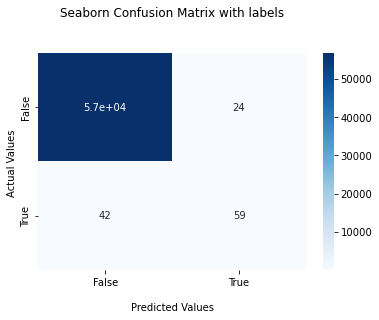

In [21]:
import seaborn as sns

ax = sns.heatmap(cm, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [30]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,44928,120599,270851,243083,105668,211710,167150,159663,185803,...,140442,174834,90634,147486,160454,105171,218749,102230,13502,0
1,0,190308,160391,134835,182525,151841,161430,120001,155852,112665,...,68639,54299,190891,72302,168529,179871,126158,142841,268,0
2,1,44982,28959,251918,175559,87589,253515,227985,194133,20473,...,223177,233865,269516,36866,68122,117706,81907,61165,23493,0
3,1,67135,107605,252751,68890,143700,244170,166825,214475,24537,...,108399,136591,60398,13166,253297,96705,191339,195684,11549,0
4,2,55018,212082,240745,177861,97922,181139,207795,54735,222386,...,143568,236625,79502,163439,94807,232984,235552,255032,6905,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,124588,581,275593,270,16342,836,1621,1093,275525,264372,...,213818,151931,270386,47379,274473,207543,272884,274268,76,0
284803,124589,86026,122771,260722,79680,225510,239000,134669,202380,206049,...,214037,248406,151105,20037,28259,54217,194562,68033,2478,0
284804,124590,236109,96082,5048,97736,268453,261587,95134,244929,192469,...,218896,211936,125608,238464,189774,131236,139638,97284,6706,0
284805,124590,128561,182906,180282,202324,101185,221246,54711,242910,188614,...,227498,236791,69699,160730,31765,236451,211636,220460,999,0
